In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
#load json file into dataframe
df_palette = pd.read_json('../data/palette.json')
df_palette = df_palette.transpose()
#make the index a column called Color
df_palette.reset_index(level=0, inplace=True)
df_palette.rename(columns={'index':'Color'}, inplace=True)
df_palette

,Color,Hex,Certainty
0,Yellow Mid,#ffeb00,Mid
1,Deep Cian Blue,#0014ff,Low
2,Phthalo Blue,#000f89,High
3,Purple,#800080,High
4,Silver,#c0c0c0,High
5,crimson,#dc143c,High
6,Orange,#ffa500,High
7,Magenta,#ff00ff,High
8,Raw Sienna,#d68a59,High
9,Lamp Black,#2c2c2c,High


In [62]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def rgb_to_hex(rgb):
    return "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))

def rgb_to_cmk(rgb):
    cmk = (1-rgb[0]/255, 1-rgb[1]/255, 1-rgb[2]/255)
    return cmk

def cmk_to_rgb(cmk):
    rgb = (1-cmk[0])*255, (1-cmk[1])*255, (1-cmk[2])*255
    return rgb



In [63]:
#add a ymc column to the dataframe
df_palette['cmk'] = df_palette['Hex'].apply(hex_to_rgb).apply(rgb_to_cmk)

In [64]:
#combine a list of ymc colors into a single ymc color
#sum the cmk values and divide by the number of colors
def combine_cmk_colors(cmk_colors, weights):
    cmk_colors = np.array(cmk_colors)
    cmk = np.array([0,0,0])
    for i in range(len(cmk_colors)):
        cmk = cmk + cmk_colors[i]*weights[i]
    cmk = cmk/sum(weights)
    return cmk





In [65]:
len_palette = len(df_palette)
proportions = [[0.5, 0.5], [0.75, 0.25], [0.25, 0.75]]
list_2_colors = []
#combining two colors
for i in range(len_palette):
    color_i = df_palette['cmk'][i]
    for j in range(len_palette):
        color_j = df_palette['cmk'][j]
        if i == j:
            continue

        for proportion in proportions:  
            cmk_color = combine_cmk_colors([color_i, color_j], proportion)
            print(cmk_color)
            print(cmk_to_rgb(cmk_color))
            print(rgb_to_hex(cmk_to_rgb(cmk_color)))
            dict_colors = {
            'color_i': df_palette['Color'][i],
            'color_j': df_palette['Color'][j],
            'color_i_hex': df_palette['Hex'][i], 
            'color_j_hex': df_palette['Hex'][j],
            'proportion_i': proportion[0],
            'proportion_j': proportion[1],
            'color_ij_hex': rgb_to_hex(cmk_to_rgb(cmk_color))
            }
            list_2_colors.append(dict_colors)


            
    

[0.5 0.5 0.5]
(127.5, 127.5, 127.5)
#7f7f7f
[0.25       0.28921569 0.75      ]
(191.25, 181.24999999999997, 63.75)
#bfb53f
[0.75       0.71078431 0.25      ]
(63.75, 73.74999999999999, 191.25)
#3f49bf
[0.5        0.50980392 0.73137255]
(127.5, 125.00000000000001, 68.49999999999999)
#7f7d44
[0.25       0.29411765 0.86568627]
(191.25, 179.99999999999997, 34.24999999999999)
#bfb322
[0.75       0.7254902  0.59705882]
(63.75, 70.0, 102.75)
#3f4666
[0.24901961 0.53921569 0.74901961]
(191.5, 117.49999999999999, 64.0)
#bf7540
[0.1245098  0.30882353 0.8745098 ]
(223.25, 176.25, 32.0)
#dfb020
[0.37352941 0.76960784 0.62352941]
(159.75, 58.74999999999999, 96.0)
#9f3a60
[0.12352941 0.1627451  0.62352941]
(223.5, 213.49999999999997, 96.0)
#dfd560
[0.06176471 0.12058824 0.81176471]
(239.25, 224.25, 48.0)
#efe030
[0.18529412 0.20490196 0.43529412]
(207.75, 202.75, 144.0)
#cfca90
[0.06862745 0.5        0.88235294]
(237.5, 127.5, 30.000000000000007)
#ed7f1e
[0.03431373 0.28921569 0.94117647]
(246.25, 1

In [66]:
df_2_colors = pd.DataFrame(list_2_colors)
df_2_colors

,color_i,color_j,color_i_hex,color_j_hex,proportion_i,proportion_j,color_ij_hex
0,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.50,0.50,#7f7f7f
1,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.75,0.25,#bfb53f
2,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.25,0.75,#3f49bf
3,Yellow Mid,Phthalo Blue,#ffeb00,#000f89,0.50,0.50,#7f7d44
4,Yellow Mid,Phthalo Blue,#ffeb00,#000f89,0.75,0.25,#bfb322
...,...,...,...,...,...,...,...
1651,Lemon Yellow,Cerulean Blue,#fff700,#2a52be,0.75,0.25,#c9cd2f
1652,Lemon Yellow,Cerulean Blue,#fff700,#2a52be,0.25,0.75,#5f7b8e
1653,Lemon Yellow,Phthalo Green,#fff700,#123524,0.50,0.50,#889611
1654,Lemon Yellow,Phthalo Green,#fff700,#123524,0.75,0.25,#c3c608


color_i           Yellow Mid
color_j         Phthalo Blue
color_i_hex          #ffeb00
color_j_hex          #000f89
proportion_i             0.5
proportion_j             0.5
color_ij_hex         #7f7d44
Name: 3, dtype: object


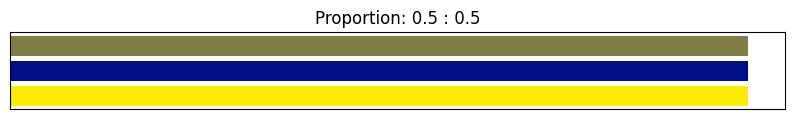

In [69]:
#fucntion to plot three colors one side by side, 3 vertical rectangles, color is passed in hex
def plot_2_colors(color_i_hex, color_j_hex, color_ij_hex, proportion_i, proportion_j):
    fig, ax = plt.subplots(figsize=(10, 1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Proportion: ' + str(proportion_i) + ' : ' + str(proportion_j))
    ax.barh(0, 1, color=color_i_hex)
    ax.barh(1, 1, color=color_j_hex)
    ax.barh(2, 1, color=color_ij_hex)
    plt.show()

idx = 3
print(df_2_colors.iloc[idx])
plot_2_colors(df_2_colors.loc[idx,"color_i_hex"], df_2_colors.loc[idx,"color_j_hex"], df_2_colors.loc[idx,"color_ij_hex"],df_2_colors.loc[idx,"proportion_i"],df_2_colors.loc[idx,"proportion_j"])

In [71]:
#fucntion to map a hex color to a 2d color to plot in a color triangle
def map_hex_to_2d(hex_color):
    rgb_color = hex_to_rgb(hex_color)
    cmk_color = rgb_to_cmk(rgb_color)
    x = cmk_color[0] - cmk_color[2]/2
    y = cmk_color[1] - cmk_color[2]/2
    return [x,y]



In [79]:
df_2_colors['color_i_2d'] = df_2_colors['color_ij_hex'].apply(map_hex_to_2d)
df_2_colors

,color_i,color_j,color_i_hex,color_j_hex,proportion_i,proportion_j,color_ij_hex,color_i_2d
0,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.50,0.50,#7f7f7f,"[0.25098039215686274, 0.25098039215686274]"
1,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.75,0.25,#bfb53f,"[-0.12549019607843137, -0.0862745098039216]"
2,Yellow Mid,Deep Cian Blue,#ffeb00,#0014ff,0.25,0.75,#3f49bf,"[0.6274509803921569, 0.5882352941176471]"
3,Yellow Mid,Phthalo Blue,#ffeb00,#000f89,0.50,0.50,#7f7d44,"[0.1352941176470588, 0.14313725490196072]"
4,Yellow Mid,Phthalo Blue,#ffeb00,#000f89,0.75,0.25,#bfb322,"[-0.1823529411764706, -0.1352941176470588]"
...,...,...,...,...,...,...,...,...
1651,Lemon Yellow,Cerulean Blue,#fff700,#2a52be,0.75,0.25,#c9cd2f,"[-0.196078431372549, -0.21176470588235297]"
1652,Lemon Yellow,Cerulean Blue,#fff700,#2a52be,0.25,0.75,#5f7b8e,"[0.40588235294117647, 0.29607843137254897]"
1653,Lemon Yellow,Phthalo Green,#fff700,#123524,0.50,0.50,#889611,"[0.0, -0.05490196078431375]"
1654,Lemon Yellow,Phthalo Green,#fff700,#123524,0.75,0.25,#c3c608,"[-0.2490196078431372, -0.2607843137254902]"


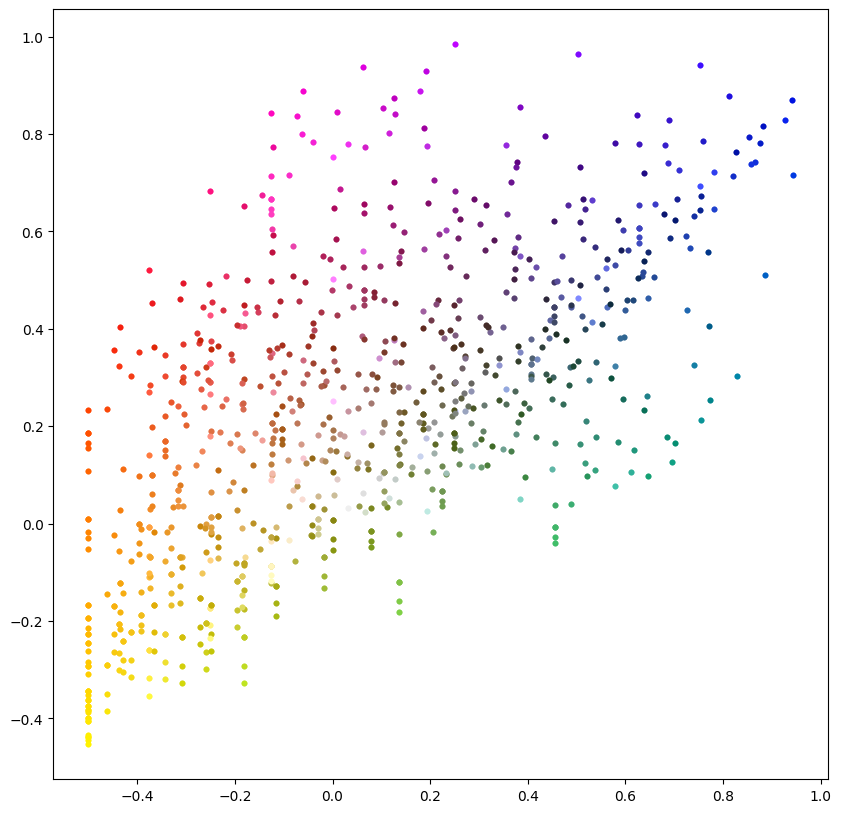

In [81]:
#plot all the x y colors in the dataframe in a 2s scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(len(df_2_colors)):
    ax.scatter(df_2_colors['color_i_2d'][i][0], df_2_colors['color_i_2d'][i][1], color=df_2_colors['color_ij_hex'][i], s=10, )
    

plt.show()


In [ ]:
def rgb_to_point(rgb):
hsv = colorsys.rgb_to_hsv(*rgb)
Convert that to a vector

rads = math.tau * hsv[0] - math.pi
mag = hsv[1] * (image_size/2) - 1 
Convert that to a point on our image

x = int(math.cos(rads) * mag + (image_size/2))
y = int(math.sin(rads) * mag + (image_size/2))
If the value is higher, return the point, otherwise None

if(hsv[2] > highest_value[x][y]):
    highest_value[x][y] = hsv[2]
    return (x, y)